<div style="color:white;background-color:#e90045;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+3 face="Lucida Calligraphy"><div style="align:center: justify">Electrical Faults Detection and Classsification</font></div>

The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

> 'Output (S)',
> Ia = Current in line A

> Ib = Current in line B

> Ic = Current in line C


> Va = Voltage in line A

> Vb = Voltage in line B

> Vc = Voltage in line C


> 'Unnamed: 7',

> 'Unnamed: 8'

> Outputs - 0 (No-fault) or 1(Fault is present)

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("detect_dataset.csv")


In [3]:
df

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,NaN,NaN
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,NaN,NaN
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,NaN,NaN
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,NaN,NaN


# basic EDA

In [4]:
#check shape of the dataset
df.shape

(12001, 9)

In [5]:
# check columns of dataset
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [6]:
# check length of dataset
len(df)


12001

In [7]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [8]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [9]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [10]:
# loop through datatset to find count of unique values of each column

df.nunique()

Output (S)        2
Ia            12001
Ib            12001
Ic            12001
Va            11996
Vb            11813
Vc            11987
Unnamed: 7        0
Unnamed: 8        0
dtype: int64

In [11]:
# drop 'Unnamed: 7','Unnamed: 8'
df.drop(columns=['Unnamed: 7', 'Unnamed: 8'],axis=1,inplace=True)

In [12]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [13]:
# check total number of fault and no-fault instances
df['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [14]:
# Using pandas
df.corr()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


<AxesSubplot:>

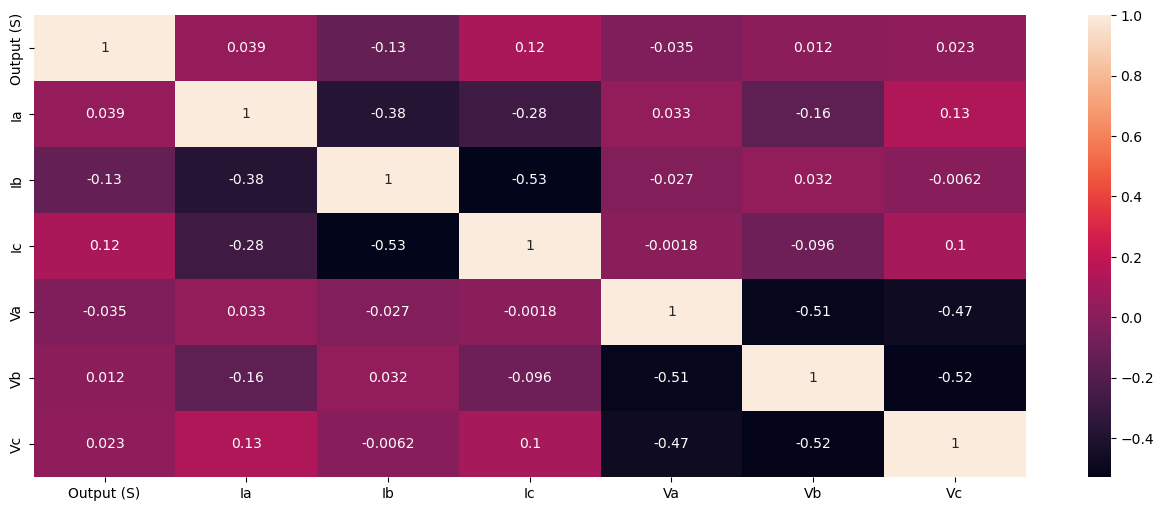

In [37]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

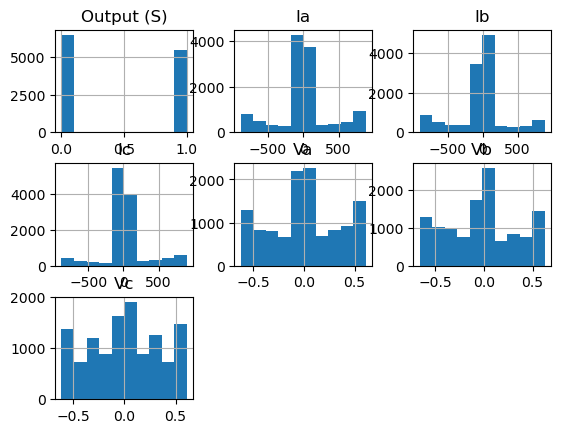

In [16]:
# Histogram using pandas 
df.hist();

In [ ]:
klib.dist_plot(df)

### Count plot

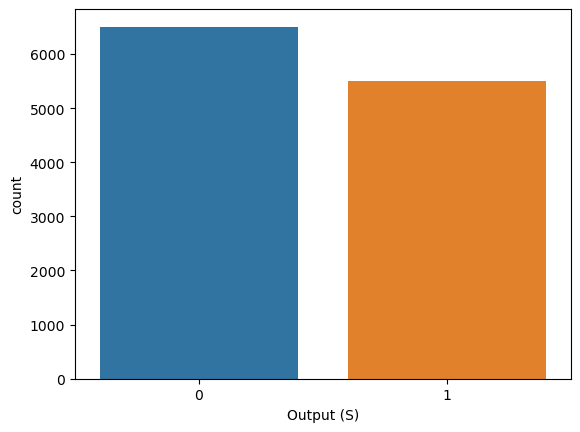

In [17]:
# count plot of Output (S) column
sns.countplot(df['Output (S)']);


# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

<AxesSubplot:>

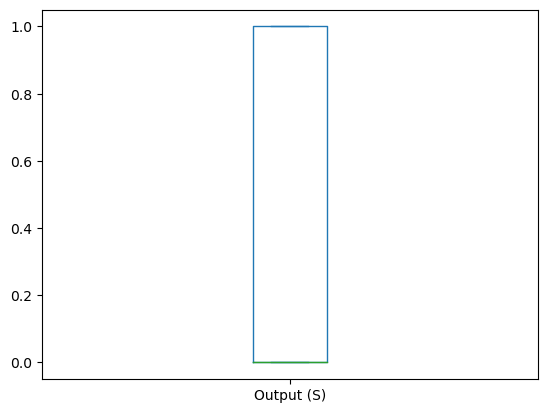

In [18]:
# box plot using pandas 
# box plot for Output (S) column 

df['Output (S)'].plot(kind='box')

<AxesSubplot:>

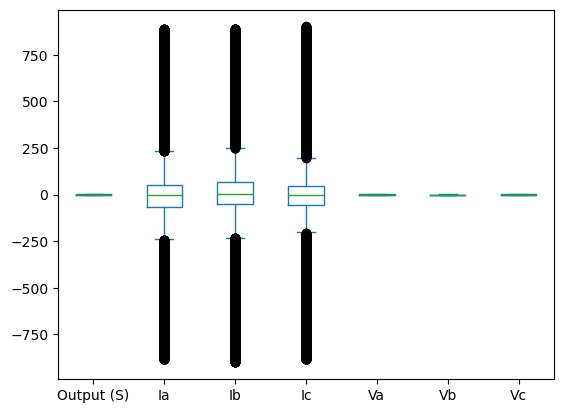

In [19]:
df.plot(kind='box')

<AxesSubplot:xlabel='Ia'>

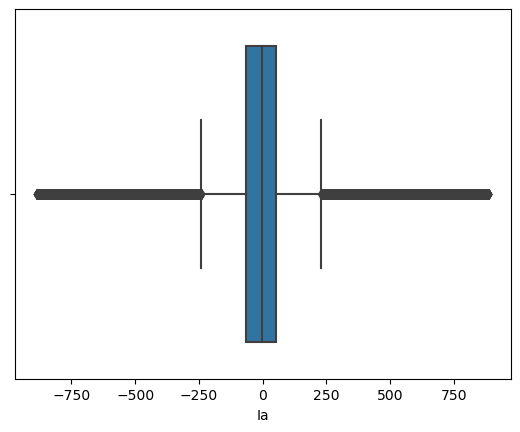

In [20]:
# box plot using pandas 
# box plot for Ia column 

sns.boxplot(df.Ia)

<AxesSubplot:xlabel='Ib'>

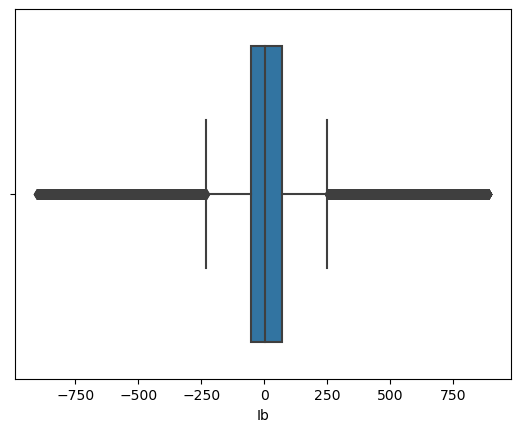

In [21]:
# box plot using pandas 
# box plot for Ib column 
sns.boxplot(df.Ib)


<AxesSubplot:>

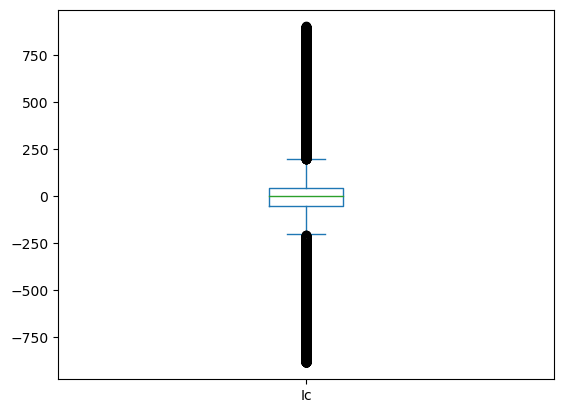

In [22]:
# box plot using pandas 
# box plot for Ic column 
df['Ic'].plot(kind='box')


<AxesSubplot:xlabel='Va'>

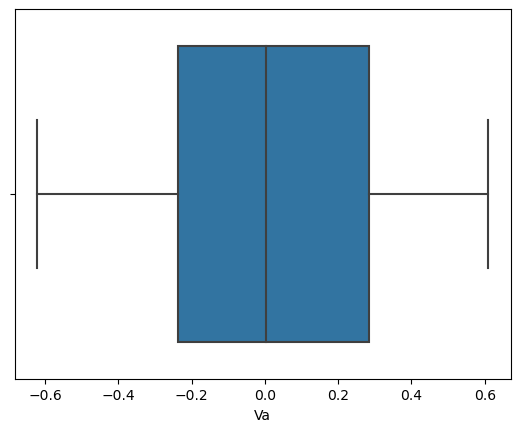

In [23]:
# box plot using pandas 
# box plot for Va column 
sns.boxplot(df.Va)



<AxesSubplot:xlabel='Vb'>

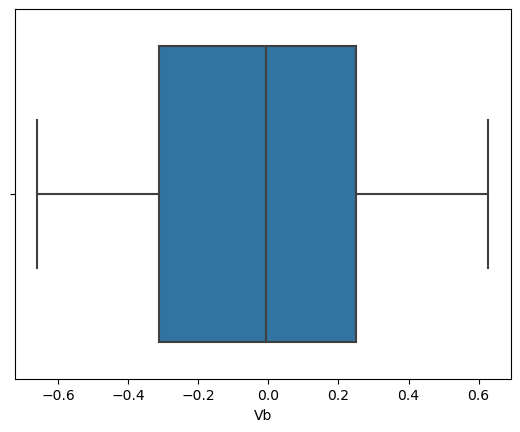

In [24]:
# box plot using pandas 
# box plot for Vb column 

sns.boxplot(df.Vb)

<AxesSubplot:>

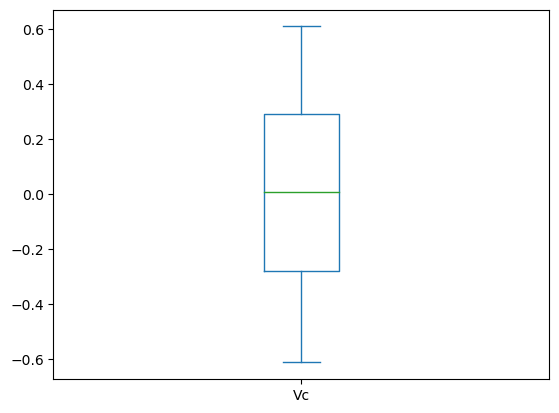

In [25]:
# box plot using pandas 
# box plot for Vc column 
df.Vc.plot(kind='box')

Dataset is balanced and not skewed in nature

# Preprocessing, Modeling and prediction on test data

In [26]:
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

In [27]:
## Split the labels and the target

X = df.drop(['Output (S)'],axis=1)
y= df['Output (S)']
#check the shape 
print(X.shape)
print(y.shape)


(12001, 6)
(12001,)


In [28]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

# check shape of X_train and y_train

print('Shape of X_train is {}, y_train is {} '.format(X_train.shape,y_train.shape))
# check shape of X_test and y_test
print('Shape of X_train is {}, y_train is {}'.format(X_train,y_train))

Shape of X_train is (9600, 6), y_train is (9600,) 
Shape of X_train is                Ia          Ib          Ic        Va        Vb        Vc
11651  -27.525808  -11.263439   35.823901  0.510232 -0.508290 -0.001943
11054    8.453765   77.551773  -89.145992 -0.549865  0.531508  0.018357
5182   -68.861065  506.679929 -435.429604 -0.268008 -0.034403  0.302411
8827   176.339696  661.274987 -837.616127  0.040675 -0.010111 -0.030564
8223    37.646082   46.627214  -82.416965 -0.353519  0.619844 -0.266325
...           ...         ...         ...       ...       ...       ...
6646    99.387536 -823.022941  725.796689 -0.034678 -0.003263  0.037941
5478   -13.072322 -623.757843  639.117602 -0.416203 -0.022459  0.438662
8548  -761.049267  160.896243  600.550918 -0.029029  0.037631 -0.008603
6276   -10.749325   75.475694  -62.486794 -0.607932  0.381110  0.226823
11125  -55.822606   92.885213  -40.181704 -0.501955 -0.046350  0.548305

[9600 rows x 6 columns], y_train is 11651    0
11054    0
5182  

### Scaling

In [29]:
# import min max scalar
from sklearn.preprocessing import MinMaxScaler

# Instantiate t
t = MinMaxScaler()

# fit on train data
X_train = t.fit_transform(X_train)
# fit on test data
X_test = t.transform(X_test)

In [60]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score

## LogisticRegression

In [64]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lgr = LogisticRegression()

# fitting the model on train data
lgr.fit(X_train,y_train)

#predict on test data

y_pred = lgr.predict(X_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix
lgr_f1 =round(score(y_test,y_pred))
lgr_precision =round(precision_score(y_test,y_pred))
lgr_recall =round(recall_score(y_test,y_pred))
lgr_roc=round(roc_auc_score(y_test,y_pred))
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,plot_confusion_matrix,roc_auc_score,classification_report,plot_roc_curve
print("Train score: {:.3f}".format(lgr.score(X_train, y_train)))
print("Test Score: {:.3f}".format(lgr.score(X_test, y_test)))
print(" ")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print('Precision score',lgr_precision)
print('Recall score',lgr_recall)
print('Roc_auc score',lgr_roc)

# visualizing importance of features
# importance = pd.Series(lgr.feature_importances_, index= features.columns)
# importance.plot(kind='bar',figsize= (18,6))
# plt.title("Fetaure importance by lgr classifier")
log_train = round(lgr.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
# display confusion matrix
plot_confusion_matrix(lgr, X_test, y_test)

NameError: name 'score' is not defined

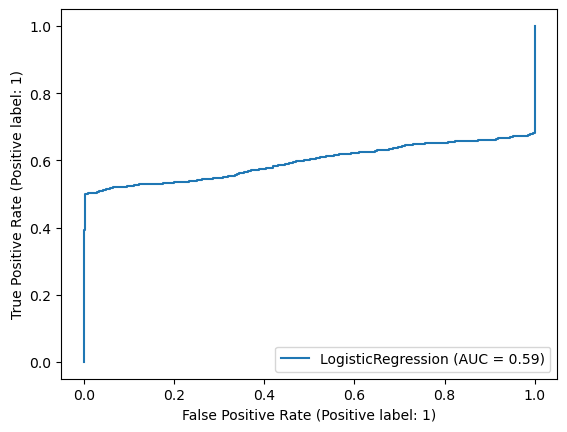

In [38]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(lgr,X_test,y_test)


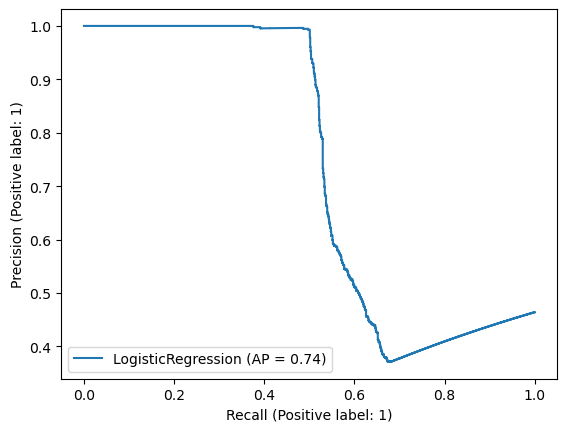

In [39]:
plot_precision_recall_curve(lgr,X_test,y_test)

## RandomForestClassifier

f1 score:  0.9968652037617555
precision score:  0.9946380697050938
recall score:  0.9991023339317774
roc auc score:  0.9972201646348865
Training ccuracy    : 99.96 %
Model Accuracy Score : 99.71 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1287
           1       0.99      1.00      1.00      1114

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

--------------------------------------------------------


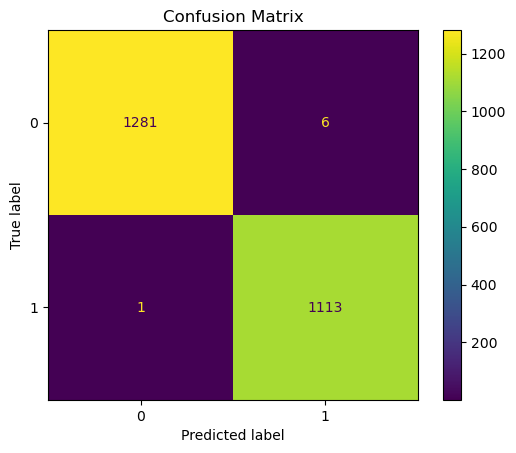

In [82]:


from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

rf_f1 =f1_score(y_test,y_pred_rf)
rf_precision =precision_score(y_test,y_pred_rf)
rf_recall =recall_score(y_test,y_pred_rf)
rf_roc=roc_auc_score(y_test,y_pred_rf)
print('f1 score: ',(rf_f1))
print('precision score: ',(rf_precision))
print('recall score: ',(rf_recall))
print('roc auc score: ',(rf_roc))
print("Training ccuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

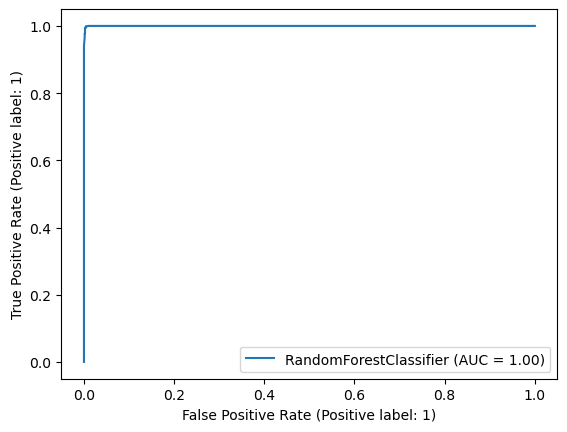

In [41]:
plot_roc_curve(random_forest,X_test,y_test)

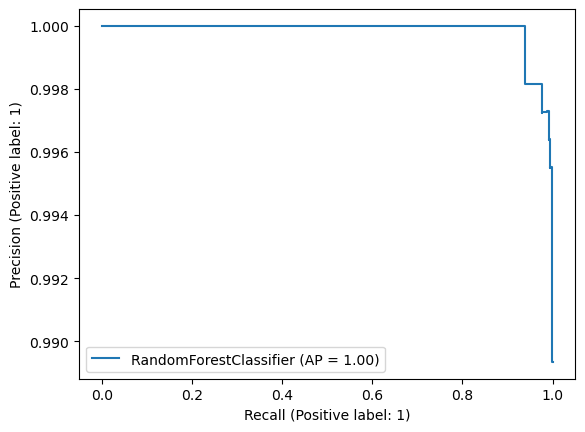

In [42]:
plot_precision_recall_curve(random_forest,X_test,y_test)

## DecisionTreeClassifier

f1 score:  0.9950650515926425
precision score:  0.9946188340807175
recall score:  0.9955116696588869
roc auc score:  0.9954248324984413
Training Accuracy    : 99.96 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1287
           1       0.99      1.00      1.00      1114

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

--------------------------------------------------------


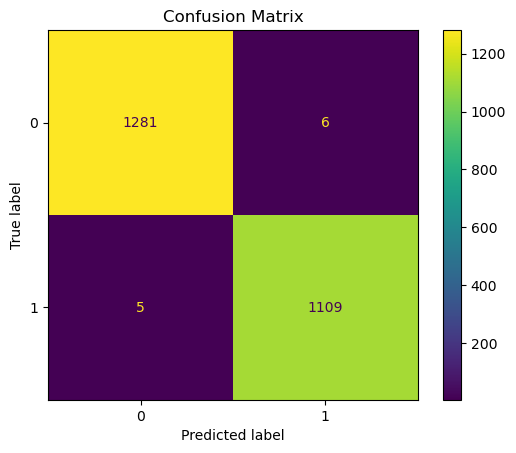

In [83]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_pred_dec) * 100, 2)
decision_f1 =f1_score(y_test,y_pred_dec)
decision_precision =precision_score(y_test,y_pred_dec)
decision_recall =recall_score(y_test,y_pred_dec)
decision_roc=roc_auc_score(y_test,y_pred_dec)
print('f1 score: ',(decision_f1))
print('precision score: ',(decision_precision))
print('recall score: ',(decision_recall))
print('roc auc score: ',(decision_roc))
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

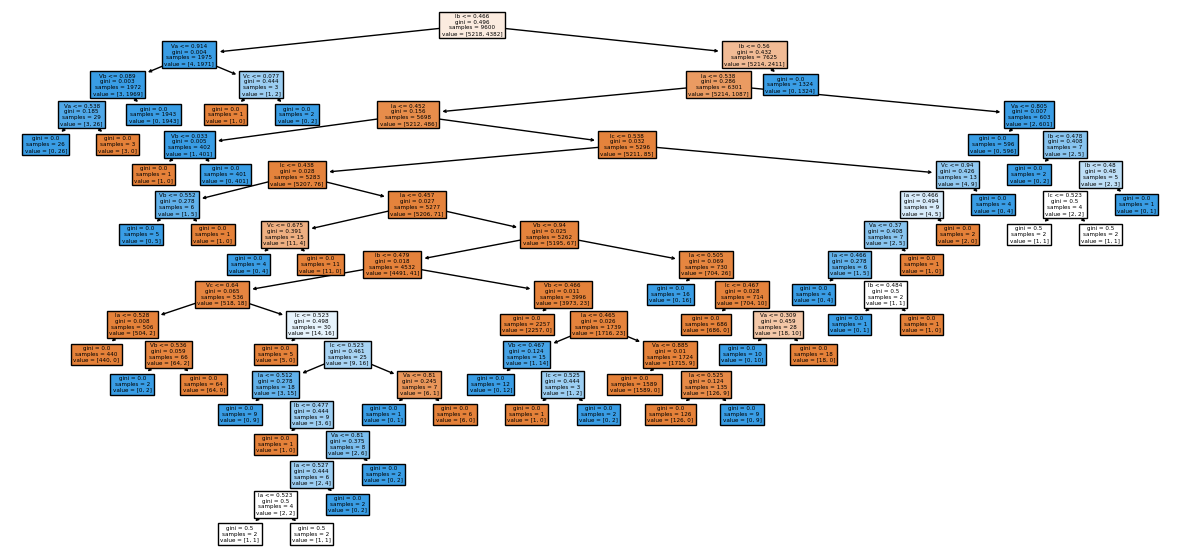

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

In [45]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

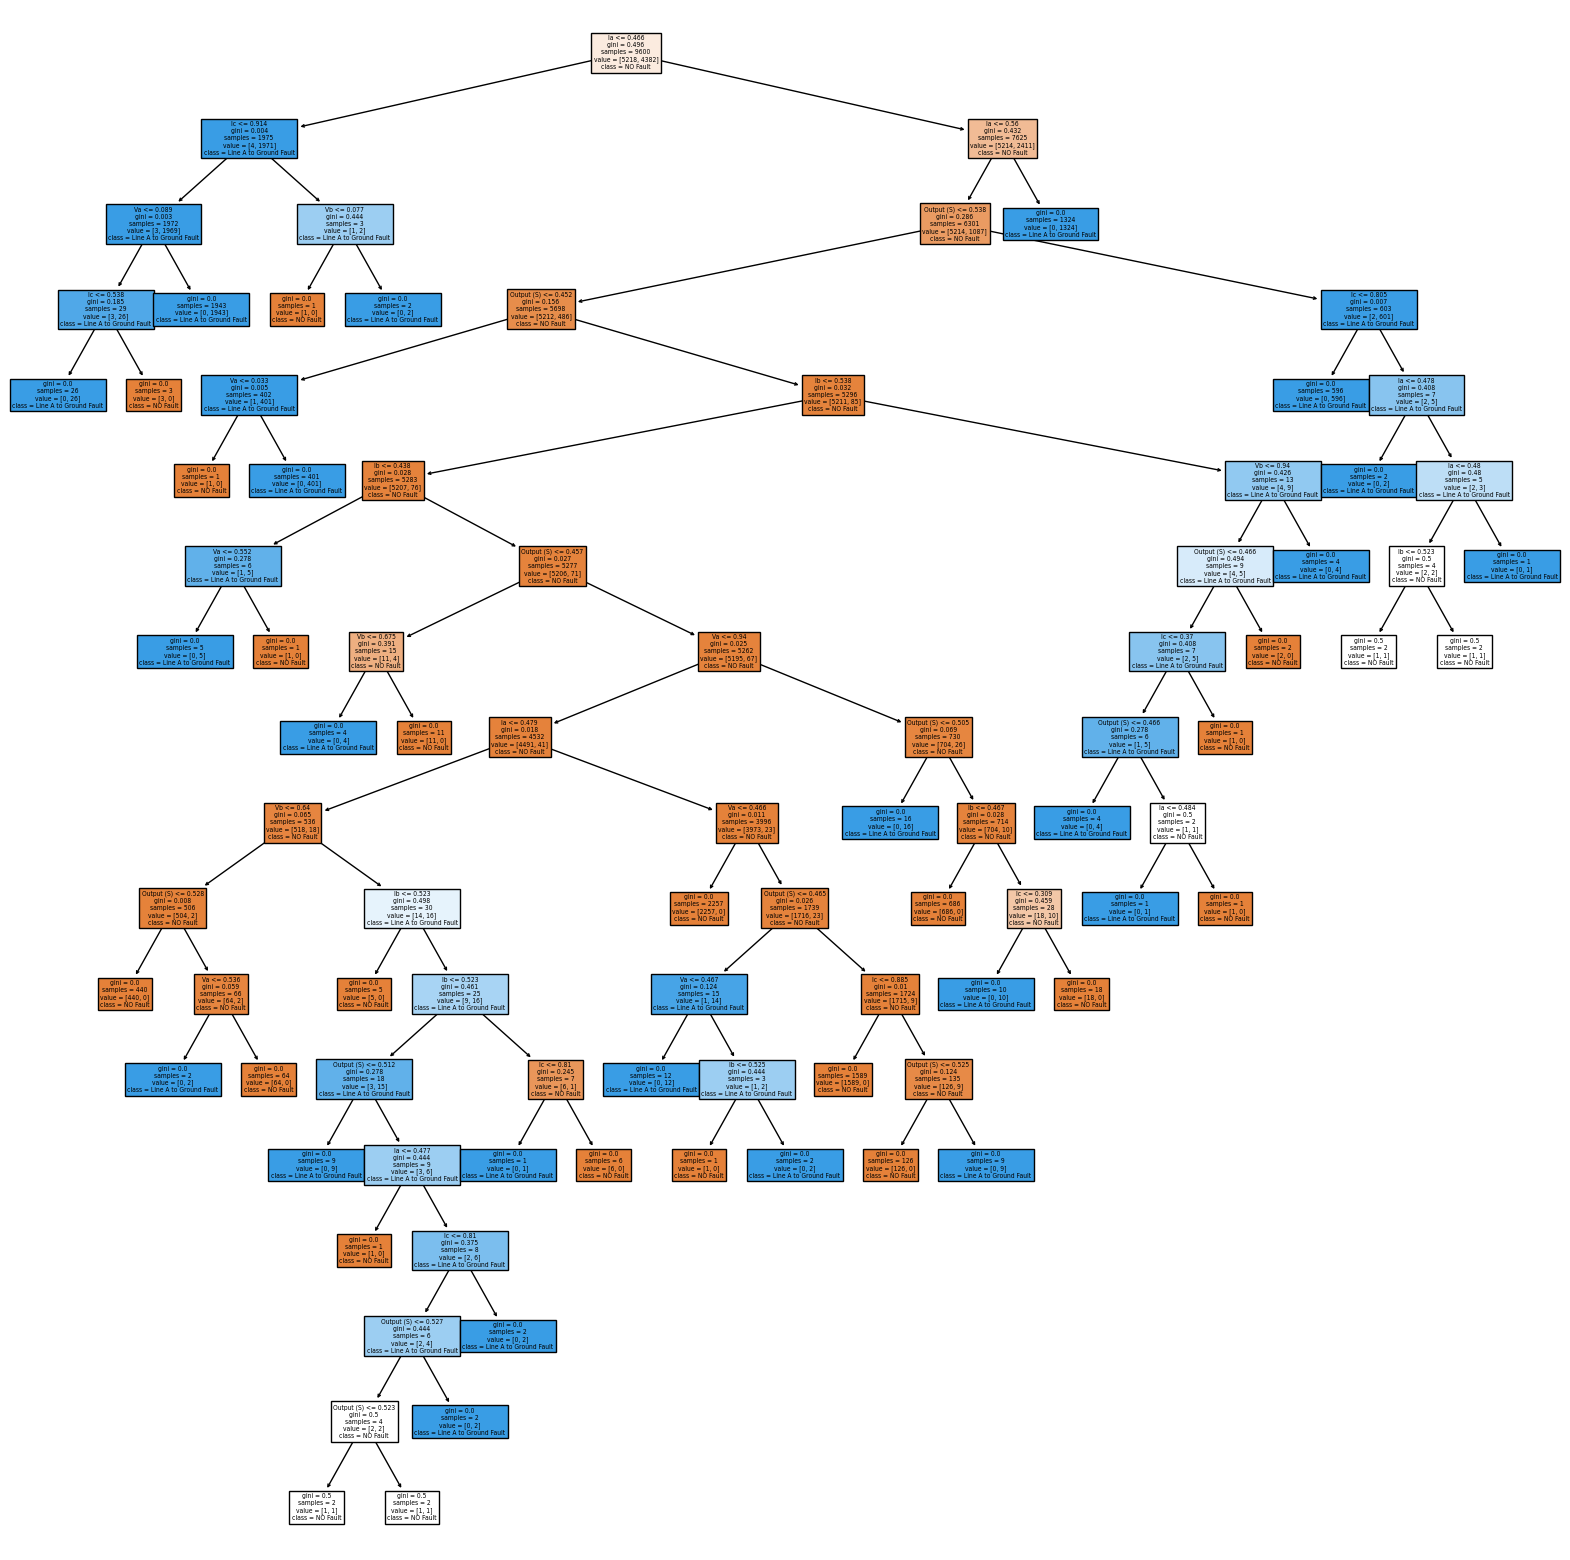

In [47]:
tree_plot(decision)

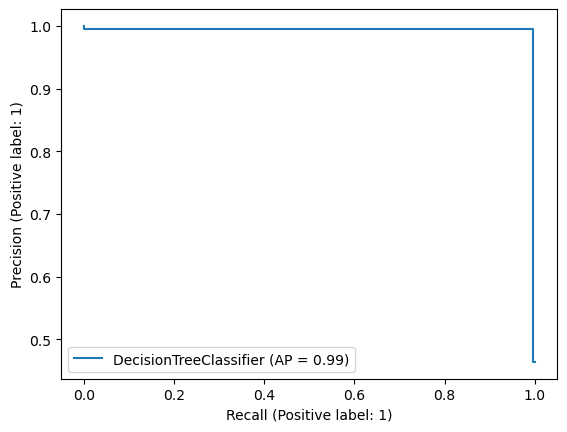

In [49]:
plot_precision_recall_curve(decision,X_test,y_test)

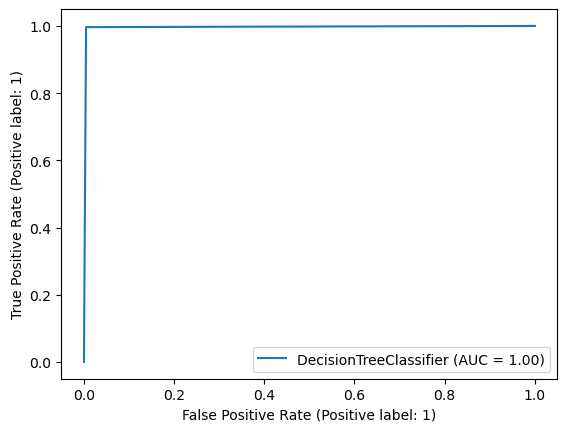

In [48]:
plot_roc_curve(decision,X_test,y_test)

## XGB classifier

f1 score:  0.9973118279569891
precision score:  0.9946188340807175
recall score:  0.9991023339317774
roc auc score:  0.9976086650233869
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1287
           1       1.00      1.00      1.00      1114

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

--------------------------------------------------------


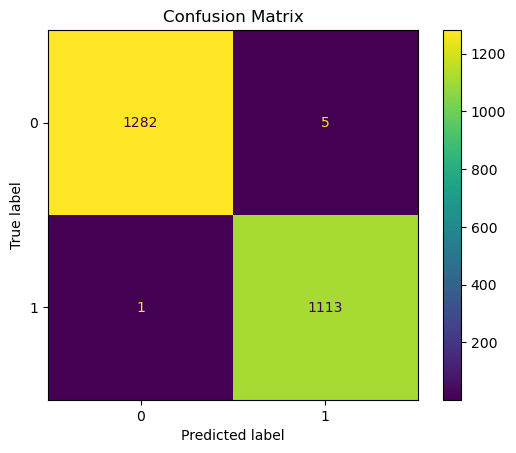

In [84]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

xgb_f1 =f1_score(y_test,y_pred_xgb)
xgb_precision =precision_score(y_test,y_pred_xgb)
xgb_recall =recall_score(y_test,y_pred_xgb)
xgb_roc=roc_auc_score(y_test,y_pred_xgb)
print('f1 score: ',(xgb_f1))
print('precision score: ',(decision_precision))
print('recall score: ',(xgb_recall))
print('roc auc score: ',(xgb_roc))
print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(xgb, X_test, y_test);
plt.title('Confusion Matrix');

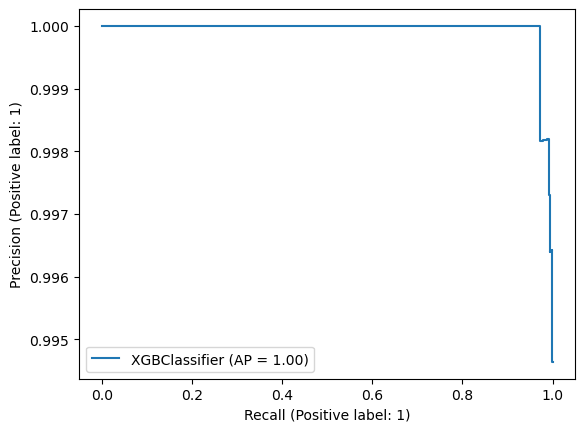

In [51]:
plot_precision_recall_curve(xgb,X_test,y_test)

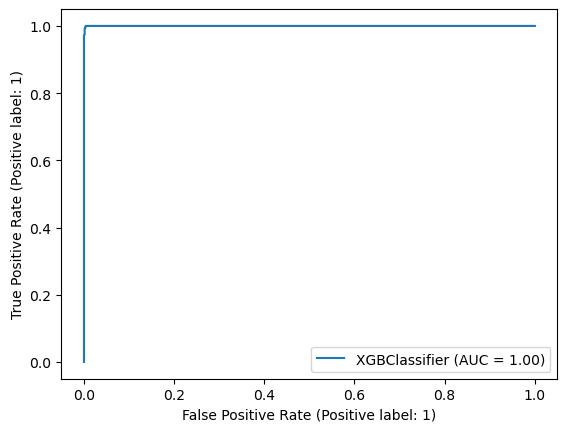

In [52]:
plot_roc_curve(xgb,X_test,y_test)

##  Support Vector Machine

f1 score:  0.9724011039558418
precision score:  0.9971698113207547
recall score:  0.9488330341113106
roc auc score:  0.9732510158901542
Training Accuracy    : 98.33 %
Model Accuracy Score : 97.5 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1287
           1       1.00      0.95      0.97      1114

    accuracy                           0.98      2401
   macro avg       0.98      0.97      0.97      2401
weighted avg       0.98      0.98      0.97      2401

--------------------------------------------------------


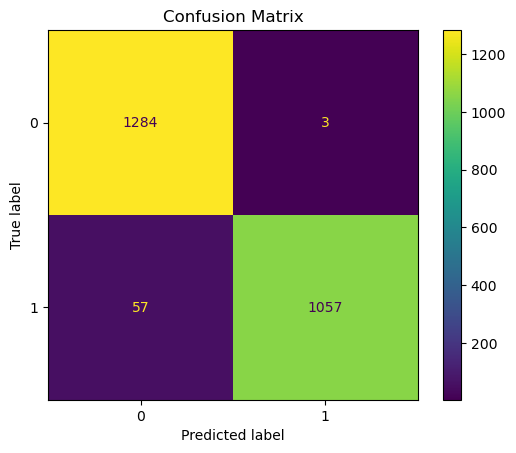

In [88]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 =f1_score(y_test,y_pred_svc)
svc_precision =precision_score(y_test,y_pred_svc)
svc_recall =recall_score(y_test,y_pred_svc)
svc_roc=roc_auc_score(y_test,y_pred_svc)
print('f1 score: ',(svc_f1))
print('precision score: ',(svc_precision))
print('recall score: ',(svc_recall))
print('roc auc score: ',(svc_roc))

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

In [93]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBClassifier',
        'Support Vector Machines',
       
    ],
    
    'Training Accuracy':
    [log_train, random_forest_train,decision_train, xgb_train, svc_train ],
    
    'Model Accuracy Score': [
        log_accuracy,random_forest_accuracy,decision_accuracy, 
        xgb_accuracy, svc_accuracy 
    ],
    'F1 score':[lgr_f1,rf_f1,decision_f1,xgb_f1,svc_f1
        
    ],
    'Precison score':[
        lgr_precision,rf_precision,decision_precision,xgb_precision,svc_precision
    ],
    'Recall score':[
        lgr_recall,rf_recall,decision_recall,xgb_recall,svc_recall
    ],
    'Roc Auc Score':[
        lgr_roc,rf_roc,decision_roc,xgb_roc,svc_roc
    ]
})

In [94]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score,F1 score,Precison score,Recall score,Roc Auc Score
2,Decision Tree,99.96,100.00,0.995065,0.994619,0.995512,0.995425
3,XGBClassifier,100.00,99.75,0.997312,0.995528,0.999102,0.997609
1,Random Forest,99.96,99.71,0.996865,0.994638,0.999102,0.997220
4,Support Vector Machines,98.33,97.50,0.972401,0.997170,0.948833,0.973251
0,Logistic Regression,71.22,71.14,0.549122,0.997636,0.378815,0.689019


<AxesSubplot:>

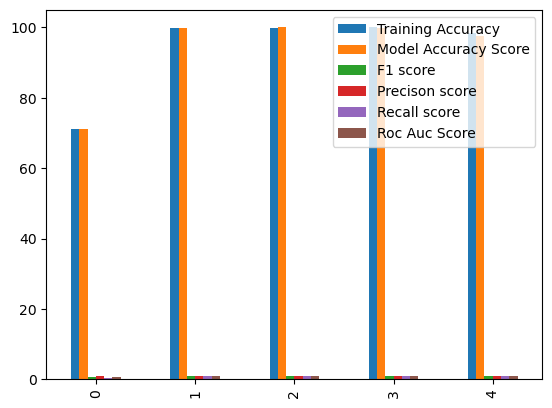

In [113]:
models.plot(kind='bar')


# Conclusion
- We have performed EDA, preprocessing, build different models, 
 
- Decision Tree is giving the best Result with 100 percent accuracy,with other metrics and  is doing  a great job till now in Fault Detection followed by Random Forest, Classifier,XGB Classifier, than the rest of the models because it's able to predict all the signals in most efficient manner while in other models there are cases where there is actually fault but the model is not able to identify it.Logistic Regression is giving the worst accuracy